## **MOBILE PRICE CLASSIFICATION**



**Dataset as 21 features and 2000 entries. The definitions of the features are given below, as such:**

* battery_power: Total energy a battery can store in one time measured in mAh
* blue: Has bluetooth or not
* clock_speed: speed at which microprocessor executes instructions
*  dual_sim: Has dual sim support or not
* fc: Front Camera mega pixels
* four_g: Has 4G or not
* int_memory: Internal Memory in Gigabytes
* m_dep: Mobile Depth in cm
* mobile_wt: Weight of mobile phone
* n_cores: Number of cores of processor
* pc: Primary Camera mega pixels
* px_height: Pixel Resolution Height
* px_width: Pixel Resolution Width
* ram: Random Access Memory in Mega Byte
* sc_h: Screen Height of mobile in cm
* sc_w: Screen Width of mobile in cm
* talk_time: longest time that a single battery charge will last when you are
* three_g: Has 3G or not
* touch_screen: Has touch screen or not
* wifi: Has wifi or not
* price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).



In [ ]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#import dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('train.csv')
df.head() 

Saving train.csv to train (2).csv


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.shape

(2000, 21)

In [ ]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Data Preparation 

Data Preparation is the process of gathering, combining, structuring, and organizing data so it can be used on Business Intelligence, Data Analytics, Forecasting the Future Data, and Data Visualization. 
The components of data preparation include data preprocessing, profiling, cleansing, validation and transformation; it often also involves pulling together data from different internal systems and external sources.

**Creating a new column calls PPI or Pixels per Inch**

In [ ]:
# Adding a new column
df['PPI'] = np.sqrt(df['px_height']**2 + df['px_width']**2) / ((np.sqrt(df['sc_h']**2 + df['sc_w']**2))/2.54)

**Checking for null values**

In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
PPI              0
dtype: int64

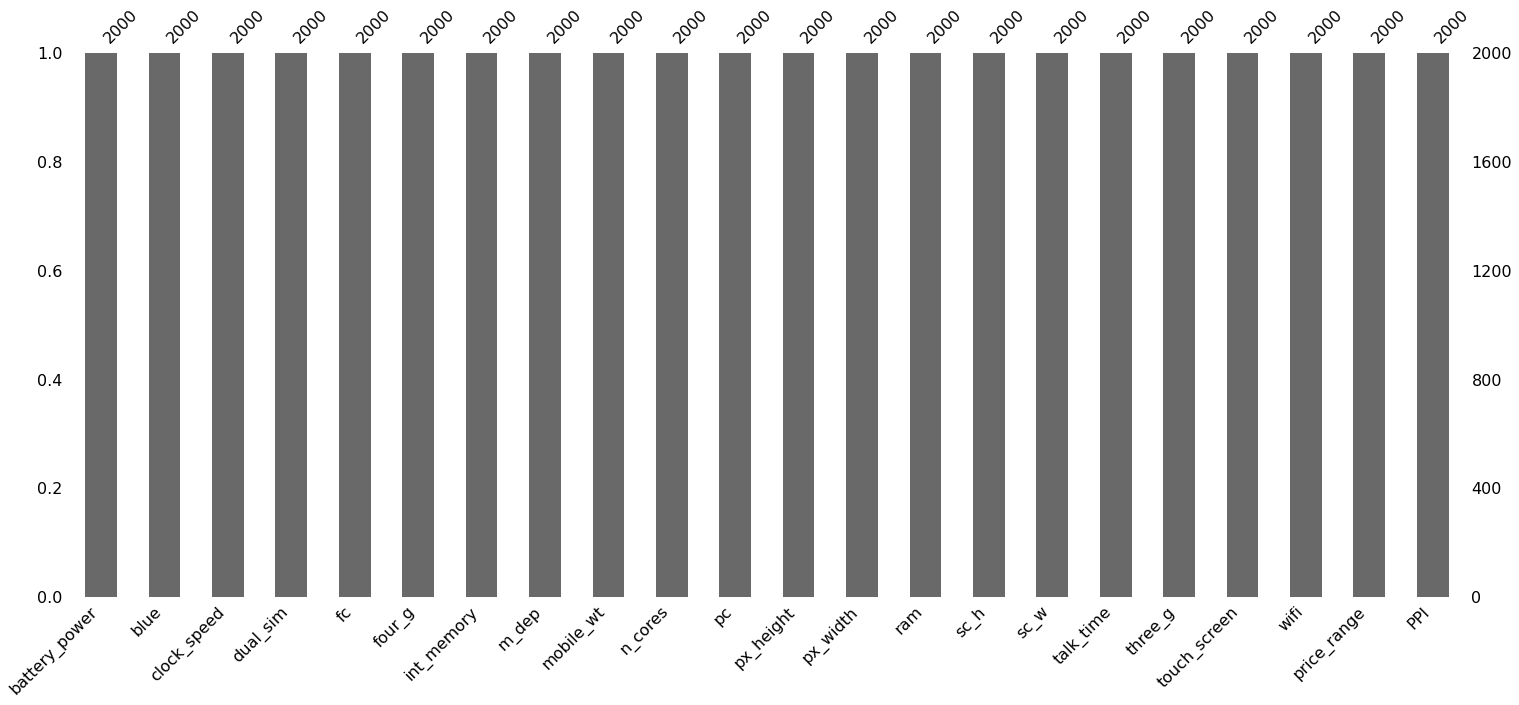

In [ ]:
import missingno as msno
msno.bar(df)
plt.show()

**Checking the variance**

In [ ]:
df.var()

battery_power    1.930884e+05
blue             2.501001e-01
clock_speed      6.658629e-01
dual_sim         2.500348e-01
fc               1.884813e+01
four_g           2.496626e-01
int_memory       3.292670e+02
m_dep            8.318353e-02
mobile_wt        1.253136e+03
n_cores          5.234197e+00
pc               3.677592e+01
px_height        1.969414e+05
px_width         1.867964e+05
ram              1.176644e+06
sc_h             1.775143e+01
sc_w             1.897820e+01
talk_time        2.985481e+01
three_g          1.817086e-01
touch_screen     2.501161e-01
wifi             2.500760e-01
price_range      1.250625e+00
PPI              3.365834e+04
dtype: float64

In [ ]:
df['price_range'].unique()

array([1, 2, 3, 0])

In [ ]:
df.head(50)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,PPI
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,168.475113
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,321.394163
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,484.058963
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,306.792809
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,527.084472
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1,288.593864
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3,180.871384
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0,196.273365
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0,137.342512
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0,197.632741


# Exploratory Data Analysis

**Relationship between ram and price**

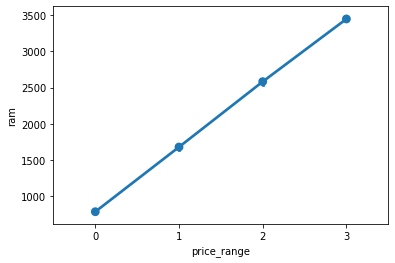

In [ ]:
sns.pointplot(y='ram',x='price_range',data=df)

**Relationship between battery and price**

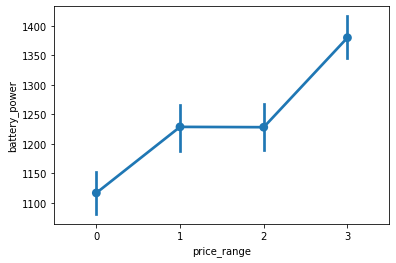

In [ ]:
sns.pointplot(x='price_range',y='battery_power',data=df)

**Relationship between Pixel per Inch and Price**

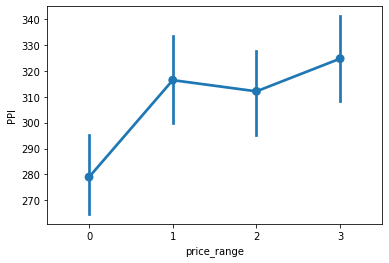

In [ ]:
sns.pointplot(x='price_range',y='PPI',data=df)

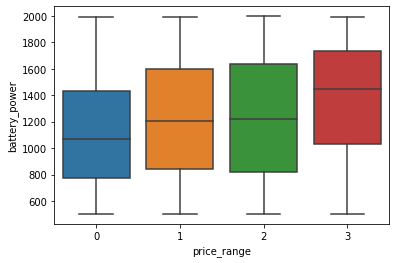

In [ ]:
sns.boxplot(x='price_range',y='battery_power',data=df)

**Relationship between memory and price**

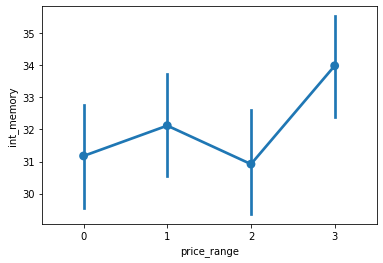

In [ ]:
sns.pointplot(x='price_range',y='int_memory',data=df)

In [ ]:
col = df.columns
col


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'PPI'],
      dtype='object')

In [ ]:
categorical_col = ['blue','dual_sim','four_g','three_g','touch_screen','price_range']

 **Count Plot for all the columns**

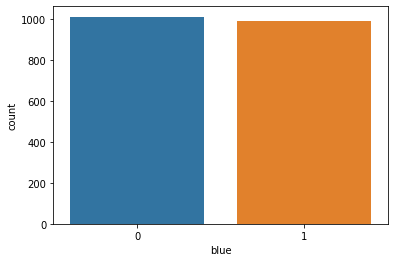

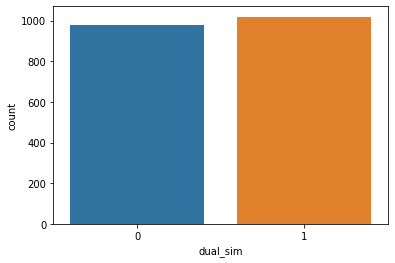

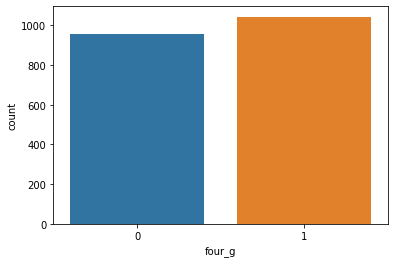

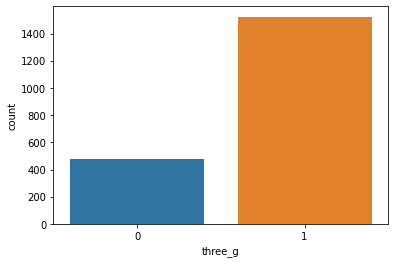

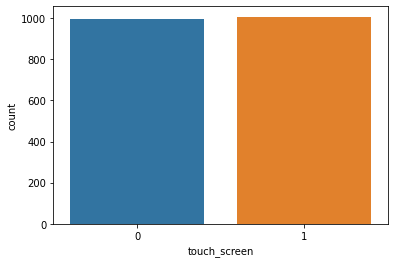

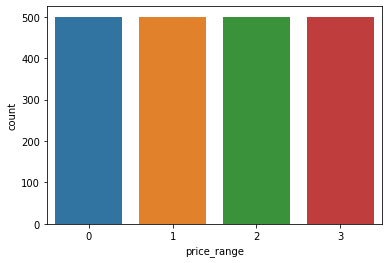

In [ ]:
for i in categorical_col:
  sns.countplot(df[i])
  plt.xlabel(i)
  plt.show()

**Histogram**

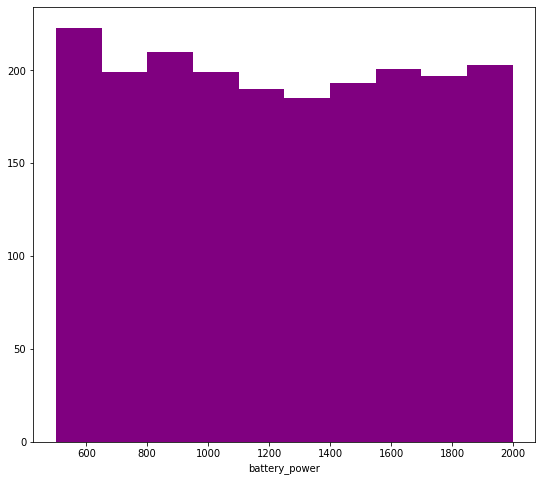

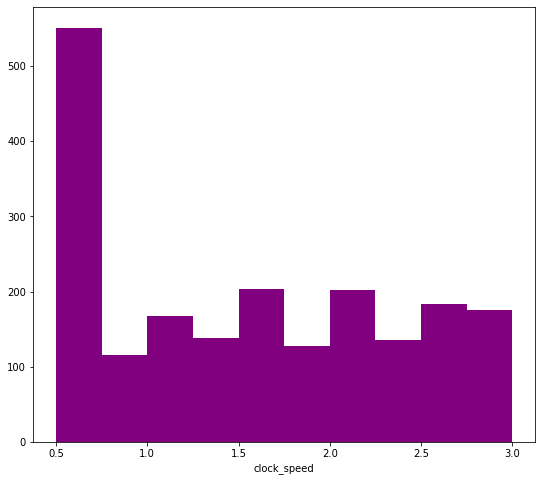

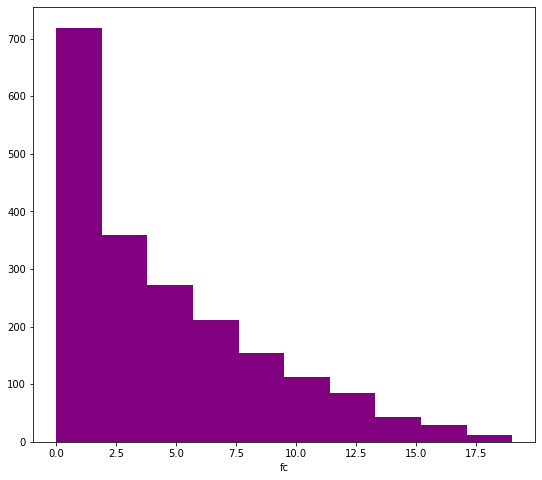

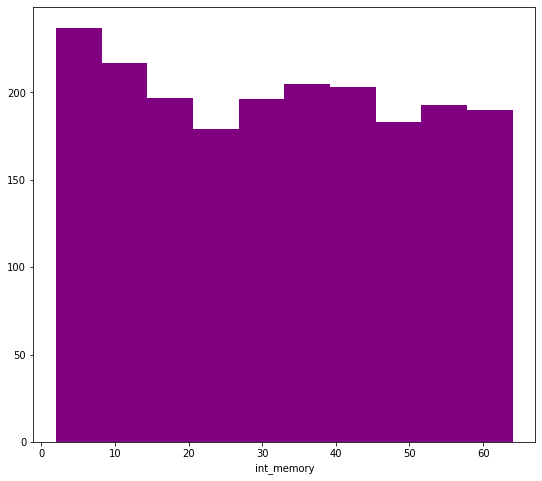

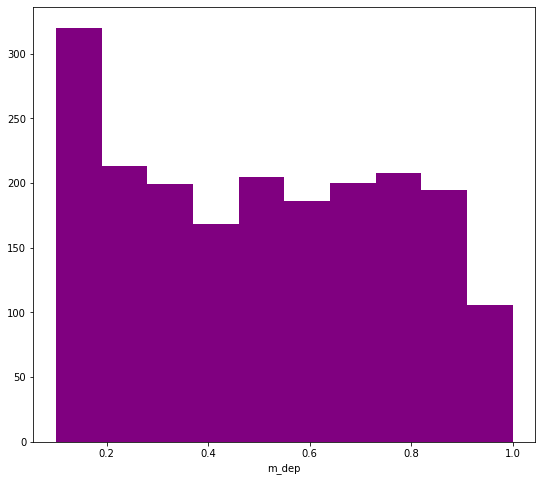

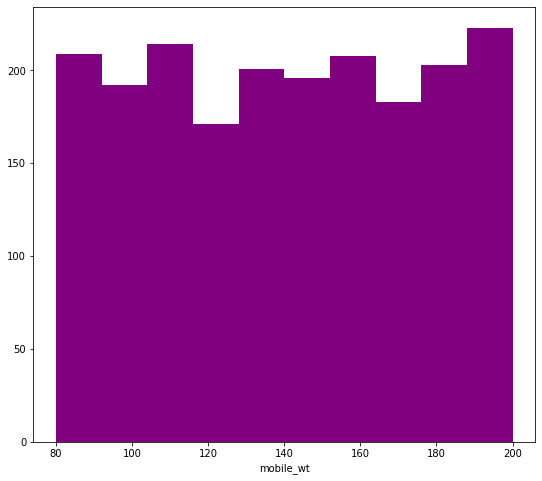

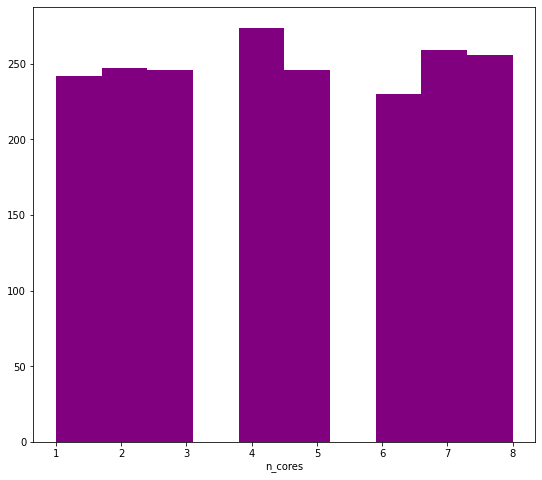

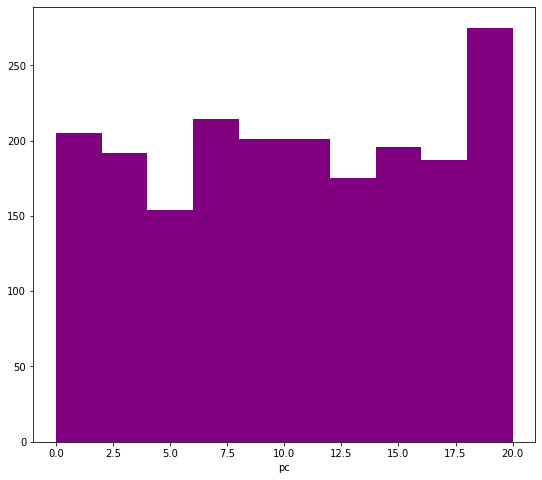

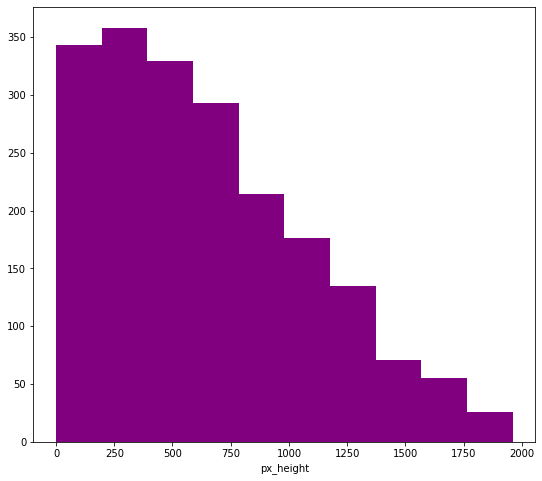

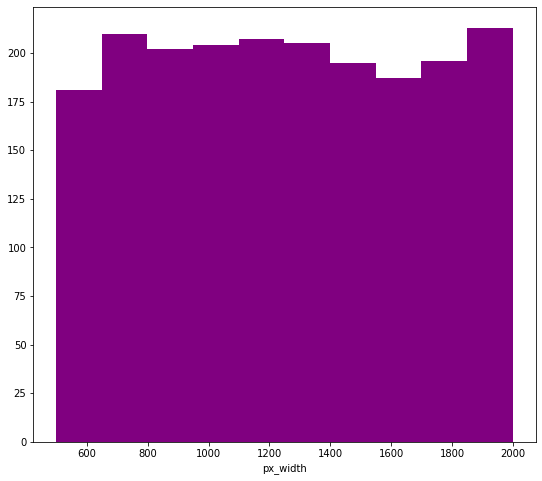

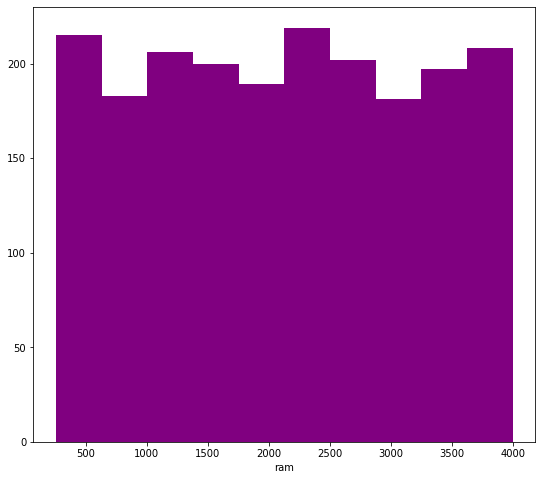

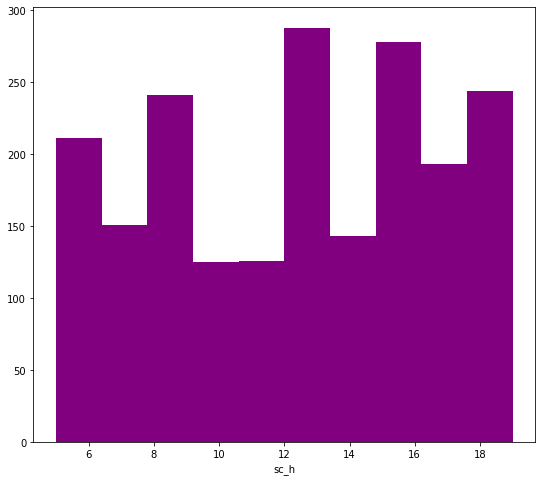

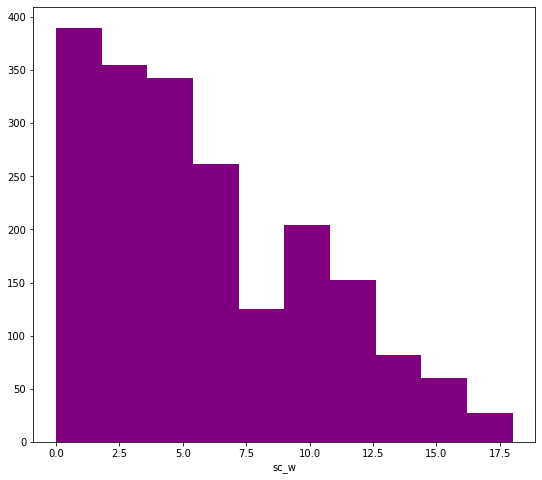

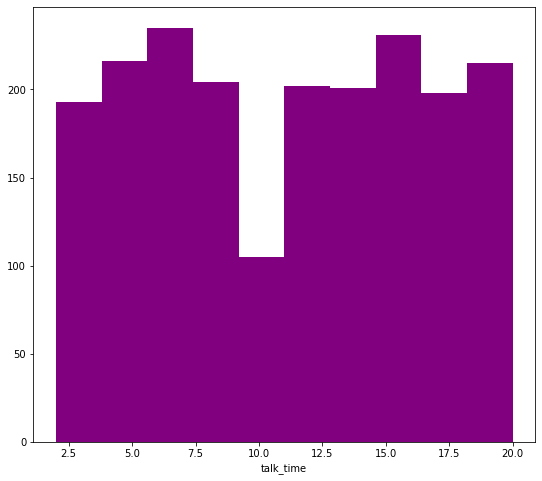

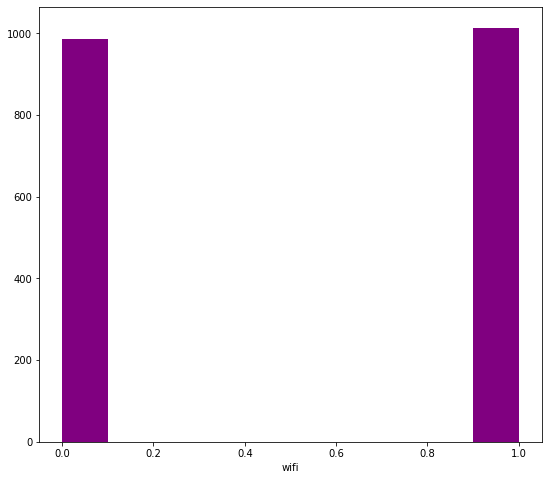

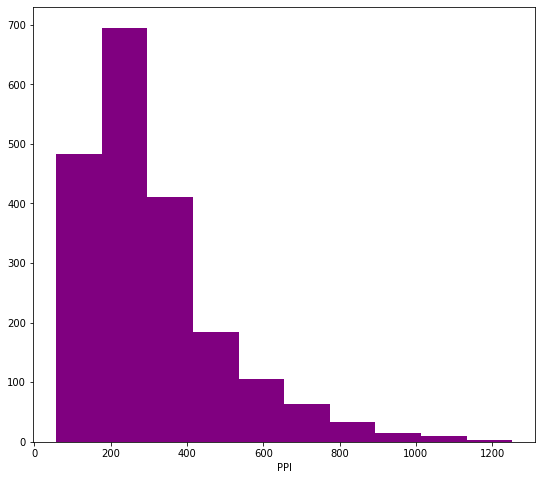

In [ ]:
 for i in df.drop(df[categorical_col],axis=1):
        fig = plt.figure(figsize=(9,8))
        plt.hist(df[i],color='purple',bins=10)
        plt.xlabel(i)
        plt.show()

**Checking the correlation by plotting correlation plot.**

Text(0.5, 1.0, 'Correlation ')

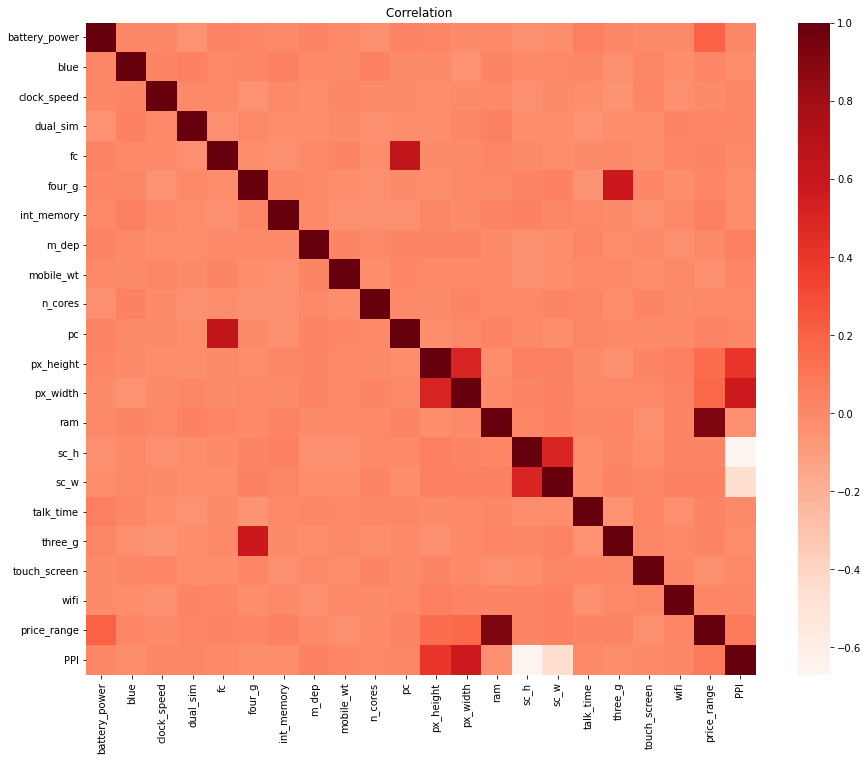

In [ ]:
corr=df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Reds')
r.set_title("Correlation ")

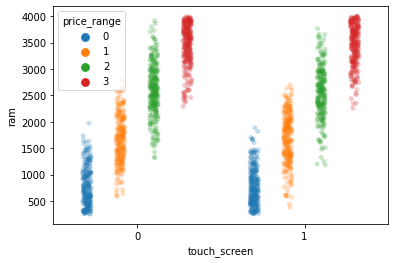

In [ ]:
# Show each observation with a scatterplot
sns.stripplot(x="touch_screen", y="ram", hue="price_range",
              data=df, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means



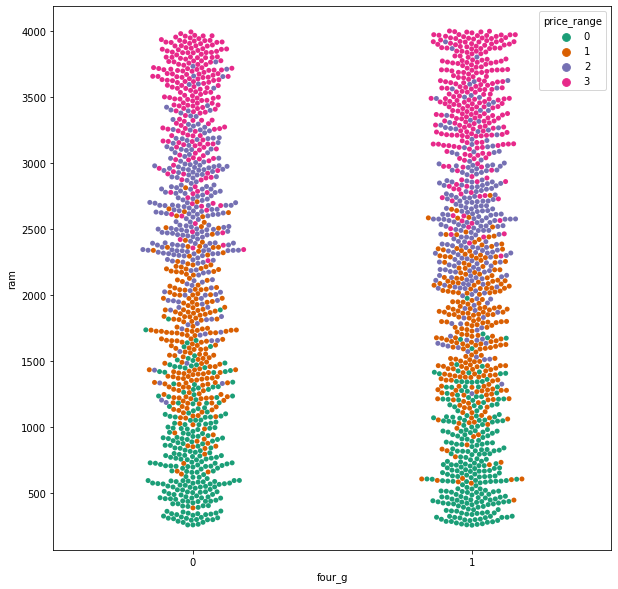

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.swarmplot(x="four_g", y="ram", hue="price_range",
              palette="Dark2", data=df)
ax=sns.set(style="darkgrid")

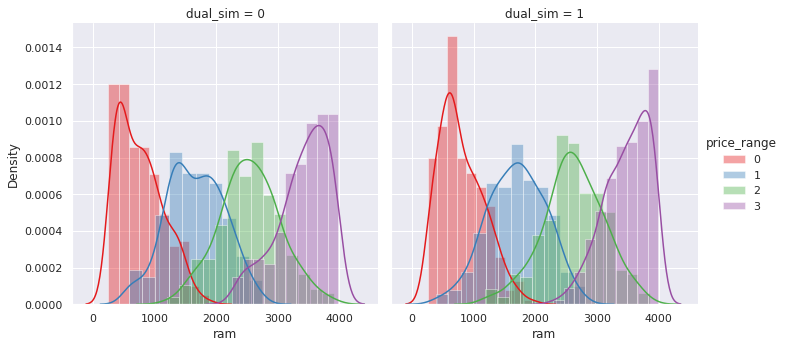

In [ ]:
g = sns.FacetGrid(df, col="dual_sim", hue="price_range", palette="Set1",height=5
                   )
g = (g.map(sns.distplot, "ram").add_legend())

In [ ]:
x=df.drop('price_range',axis=1)
y=df['price_range']

In [ ]:
scale=StandardScaler()
scaled=scale.fit_transform(x)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.010235,battery_power
1,1.011430,blue
2,1.006027,clock_speed
3,1.011575,dual_sim
4,1.719118,fc
5,1.528526,four_g
6,1.009515,int_memory
7,1.006717,m_dep
8,1.004734,mobile_wt
9,1.008444,n_cores


So,from 20 VIF that has been calculated only PPI column that has a multicollinearity but the other has VIF less than 5.

**3G supported phones**

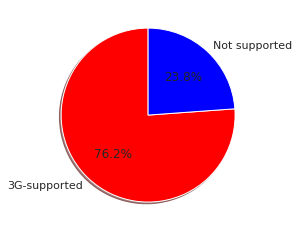

In [ ]:
labels = ["3G-supported",'Not supported']
values = df['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['red', 'blue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

**4G supported phones**

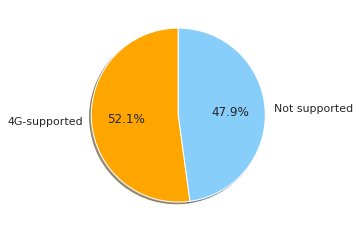

In [ ]:
labels = ["4G-supported",'Not supported']
values = df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['orange', 'lightskyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

Text(0.5, 0, 'MegaPixels')

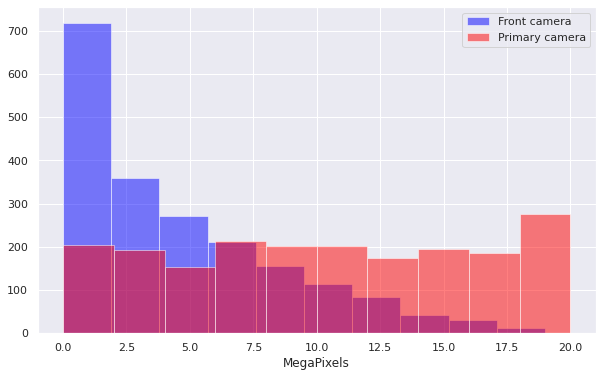

In [ ]:
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

##X and Y Array
Prepare for modelling array

In [ ]:
X=df.drop('price_range',axis=1)

In [ ]:
y=df['price_range']

In [ ]:
# Splitting the Data into Train and Test from Train dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Modelling Test

Modelling Test is a way to find out which model is the most accurate in the mobile price prediction process.

## ADA Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

# Test Score of ADA Boost
ada.fit(X_train,y_train)
ada.score(X_test,y_test)

0.8106060606060606

## KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

# Test Score of KNN
knn.score(X_test,y_test)

confusion matrix:
 [[155   3   0   0]
 [  9 140   3   0]
 [  0  21 171   7]
 [  0   0  13 138]]


0.9151515151515152

### Elbow Method

In [ ]:
# Checking the Optimum Value
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

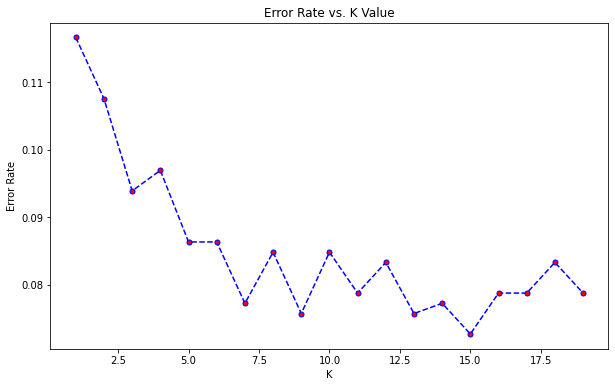

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Linear Logistic Model

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = logmodel.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

# Test Score of LGM
logmodel.score(X_test,y_test)

confusion matrix:
 [[124  31   3   0]
 [ 25  85  35   7]
 [  0  43  85  71]
 [  0   1  29 121]]


0.6287878787878788

## Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=1, criterion='gini',
                               random_state=1)
dtree.fit(X_train,y_train)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = dtree.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

# Test Score of Decision Tree Model
dtree.score(X_test,y_test)

confusion matrix:
 [[138  20   0   0]
 [ 18 112  21   1]
 [  0  18 154  27]
 [  0   0  20 131]]


0.8106060606060606

## Random Tree Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

# Test Score of Random Tree Model
rfc.score(X_test,y_test)

confusion matrix:
 [[148  10   0   0]
 [ 11 137   4   0]
 [  0  28 147  24]
 [  0   0  10 141]]


0.8681818181818182

## Support Vector Machine (SVM) Model

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear',random_state = 0)
svc.fit(X_train,y_train)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

# Test Score of Support Vector Machine
svc.score(X_test,y_test)

confusion matrix:
 [[156   2   0   0]
 [  1 148   3   0]
 [  0  10 186   3]
 [  0   0   5 146]]


0.9636363636363636

## XGB Model

In [ ]:
from xgboost import XGBClassifier
xc = XGBClassifier(use_label_encoder=False,)
xc.fit(X_train,y_train)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = xc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n',cm)

# Test Score of XG Boost
xc.score(X_test,y_test)

confusion matrix:
 [[148  10   0   0]
 [  6 143   3   0]
 [  0  20 162  17]
 [  0   0  14 137]]


0.8939393939393939

## Cat Boost

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
cb = CatBoostClassifier()
cb.fit(X_train,y_train)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = cb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n',cm)

# Test Score of XG Boost
cb.score(X_test,y_test)

Learning rate set to 0.080317
0:	learn: 1.2776657	total: 17.6ms	remaining: 17.6s
1:	learn: 1.1902401	total: 32ms	remaining: 16s
2:	learn: 1.1135353	total: 44.2ms	remaining: 14.7s
3:	learn: 1.0430859	total: 54.2ms	remaining: 13.5s
4:	learn: 0.9947464	total: 75ms	remaining: 14.9s
5:	learn: 0.9397435	total: 97.8ms	remaining: 16.2s
6:	learn: 0.8921649	total: 107ms	remaining: 15.1s
7:	learn: 0.8462200	total: 113ms	remaining: 14s
8:	learn: 0.8165152	total: 121ms	remaining: 13.4s
9:	learn: 0.7878053	total: 131ms	remaining: 12.9s
10:	learn: 0.7540626	total: 151ms	remaining: 13.6s
11:	learn: 0.7208924	total: 175ms	remaining: 14.4s
12:	learn: 0.6893371	total: 202ms	remaining: 15.3s
13:	learn: 0.6657436	total: 210ms	remaining: 14.8s
14:	learn: 0.6445818	total: 218ms	remaining: 14.3s
15:	learn: 0.6158531	total: 226ms	remaining: 13.9s
16:	learn: 0.5932507	total: 233ms	remaining: 13.5s
17:	learn: 0.5730141	total: 241ms	remaining: 13.2s
18:	learn: 0.5575239	total: 249ms	remaining: 12.8s
19:	learn: 0.

0.9409090909090909

## Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = gbc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n',cm)

# Test Score of XG Boost
gbc.score(X_test,y_test)

Confusion Matrix:
 [[147  11   0   0]
 [  7 141   4   0]
 [  0  18 163  18]
 [  0   0  16 135]]


0.8878787878787879

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n',cm)

# Test Score of Naive Bayes
nb.score(X_test,y_test)

Confusion Matrix:
 [[141  17   0   0]
 [ 15 116  21   0]
 [  0  28 145  26]
 [  0   0  19 132]]


0.8090909090909091

## Comparing the Model Accuracy

In [ ]:
adas = ada.score(X_test,y_test)
knns = knn.score(X_test,y_test)
logmodelscore = logmodel.score(X_test,y_test)
dtrees = dtree.score(X_test,y_test)
rfcs = rfc.score(X_test,y_test)
svcs = svc.score(X_test,y_test)
xgbs = xc.score(X_test,y_test)
cbs = cb.score(X_test,y_test)
gbcs = gbc.score(X_test, y_test)
nbs = nb.score(X_test,y_test)

Text(0.5, 1.0, 'Plotting the Model Accuracies')

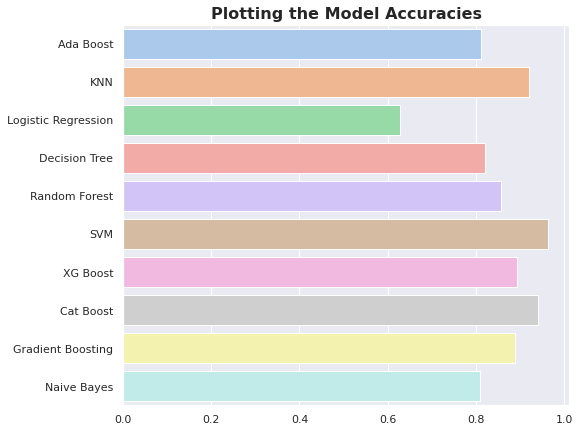

In [ ]:
plt.figure(figsize= (8,7))
ac = [adas, knns, logmodelscore, dtrees, rfcs, svcs, xgbs, cbs, gbcs, nbs]
name = ['Ada Boost','KNN','Logistic Regression','Decision Tree','Random Forest','SVM','XG Boost','Cat Boost','Gradient Boosting','Naive Bayes']
sns.barplot(x = ac,y = name,palette='pastel')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

The best and fit models is Support Vector Machine.

Support Vector Machine (SVM) is one of the classification methods in data mining. SVM can also make predictions on both classification and regression. Basically SVM has a linear principle, but now SVM has been developed so that it can work on non-linear problems. The way SVM works on non-linear problems is to incorporate kernel concepts into high-dimensional space. In this dimensional space, a separator or what is often called a hyperplane will be sought later. Hyperplanes can maximize the distance or margin between data classes. The best hyperplane between the two classes can be found by measuring the margin and then finding the maximum point. Efforts to find the best hyperplane as a class separator is the core of the process in the SVM method.

# Price Prediction

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
pred = svc.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       158
           1       0.93      0.97      0.95       152
           2       0.96      0.93      0.95       199
           3       0.98      0.97      0.97       151

    accuracy                           0.96       660
   macro avg       0.96      0.97      0.96       660
weighted avg       0.96      0.96      0.96       660



In [ ]:
matrix=confusion_matrix(y_test,pred)
print(matrix)

[[156   2   0   0]
 [  1 148   3   0]
 [  0  10 186   3]
 [  0   0   5 146]]


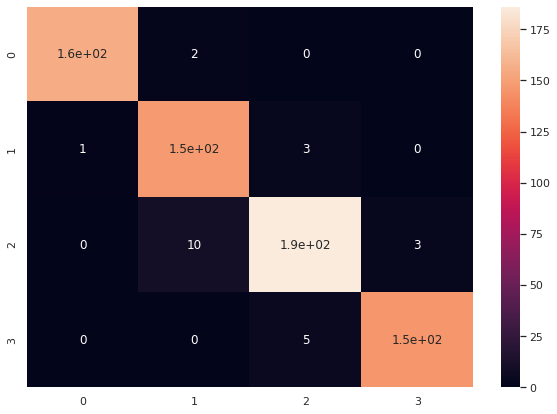

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

# Price Prediction Using SVC

In [ ]:
from google.colab import files
uploaded = files.upload()
df_test = pd.read_csv('test.csv')
df_test.head()

Saving test.csv to test.csv


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [ ]:
df_test=df_test.drop('id',axis=1)

In [ ]:
# Adding a new column
df_test['PPI'] = np.sqrt(df_test['px_height']**2 + df_test['px_width']**2) / ((np.sqrt(df_test['sc_h']**2 + df_test['sc_w']**2))/2.54)

In [ ]:
df_test.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,PPI
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,261.446363
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,480.994046
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,240.202289
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,451.272229
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,164.834496


## Applying Model

In [ ]:
predicted_price=svc.predict(df_test)

## Predicted Price Range

In [ ]:
predicted_price

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 1, 3, 0, 1, 2, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

## Adding The Prediction Result

Add the result of prediction of test.csv to the price range column

In [ ]:
df_test['price_range']=predicted_price

In [ ]:
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,PPI,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,261.446363,3
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,480.994046,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,240.202289,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,451.272229,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,164.834496,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0,175.997864,2
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1,629.349975,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0,484.109341,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0,113.729073,2


The result of price prediction is a lot of Price Range increased to higher category or decreased to lower category. It is because of trend of mobile specifications.

When mobile used large RAM capacity, the price will increased and also when mobile used good LCD to support 4K video the price also increased.